<a href="https://colab.research.google.com/github/adithyanperingode/MI-IPL-Match-Result-Prediction/blob/main/MI_IPL_Match_Result-Prediction_V0.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
# Importing Libraries
import pandas as pd
import numpy as np

In [110]:
# Load the dataset from Github
Data = pd.read_csv('https://raw.githubusercontent.com/adithyanperingode/MI-IPL-Match-Result-Prediction/main/MI%20IPL%20Data_Post%20EDA.csv')
Data.head()

,Sr No,Time,MI_Match No,Match_City,Match_Month,Match_Date,Match Type,Toss,Batting Sequence,Match Score_100,...,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,Umpire_Nitin Menon,Umpire_Kumar Dharmasena,Umpire_Chris Gaffaney,Umpire_Others,Result
0,1.0,D/N,2.0,Mumbai,May,Odd,Home,Won,2.0,0.0,...,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,Win
1,2.0,N,3.0,Mumbai,May,Even,Home,Lost,2.0,0.0,...,3.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,Win
2,3.0,N,4.0,Mumbai,May,Odd,Home,Won,2.0,0.0,...,4.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,Win
3,4.0,N,5.0,Mumbai,Apr,Even,Home,Lost,1.0,0.0,...,4.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,Win
4,5.0,N,6.0,Mumbai,Apr,Even,Home,Won,2.0,0.0,...,3.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,Lost


In [111]:
# Extracting the Columns with Categorical Values
categorical_cols = [col for col in Data.columns if Data[col].dtype == 'object']
print(categorical_cols)

['Time ', 'Match_City', 'Match_Month', 'Match_Date', 'Match Type', 'Toss', 'Match_Stadium', 'Captain', 'Head Coach', 'Result']


In [112]:
# Basic information about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sr No                    246 non-null    float64
 1   Time                     236 non-null    object 
 2   MI_Match No              246 non-null    float64
 3   Match_City               246 non-null    object 
 4   Match_Month              246 non-null    object 
 5   Match_Date               246 non-null    object 
 6   Match Type               246 non-null    object 
 7   Toss                     246 non-null    object 
 8   Batting Sequence         245 non-null    float64
 9   Match Score_100          246 non-null    float64
 10  Match Score_150          246 non-null    float64
 11  Match Score_200          246 non-null    float64
 12  Match Score_250          246 non-null    float64
 13  Match_Stadium            246 non-null    object 
 14  Captain                  2

In [113]:
# prompt: Calaculate null values % in each columns

null_values_percent = (Data.isnull().sum() / Data.shape[0]) * 100
for col, percent in zip(Data.columns, null_values_percent):
    print(f"Column '{col}' has {percent:.2f}% null values.")

Column 'Sr No' has 0.40% null values.
Column 'Time ' has 4.45% null values.
Column 'MI_Match No' has 0.40% null values.
Column 'Match_City' has 0.40% null values.
Column 'Match_Month' has 0.40% null values.
Column 'Match_Date' has 0.40% null values.
Column 'Match Type' has 0.40% null values.
Column 'Toss' has 0.40% null values.
Column 'Batting Sequence' has 0.81% null values.
Column 'Match Score_100' has 0.40% null values.
Column 'Match Score_150' has 0.40% null values.
Column 'Match Score_200' has 0.40% null values.
Column 'Match Score_250' has 0.40% null values.
Column 'Match_Stadium' has 0.40% null values.
Column 'Captain' has 0.40% null values.
Column 'Head Coach' has 0.00% null values.
Column 'No of BlowersBL' has 0.40% null values.
Column 'No of All Rounders' has 0.40% null values.
Column 'No of Batsman' has 0.40% null values.
Column 'Umpire_Sundaram Ravi' has 0.40% null values.
Column 'Umpire_Anil Chaudhary' has 0.40% null values.
Column 'Umpire_Nitin Menon' has 0.40% null value

In [114]:
# Replace the null value in ''Time' with Mode

Data['Time '].fillna(Data['Time '].mode()[0], inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sr No                    246 non-null    float64
 1   Time                     247 non-null    object 
 2   MI_Match No              246 non-null    float64
 3   Match_City               246 non-null    object 
 4   Match_Month              246 non-null    object 
 5   Match_Date               246 non-null    object 
 6   Match Type               246 non-null    object 
 7   Toss                     246 non-null    object 
 8   Batting Sequence         245 non-null    float64
 9   Match Score_100          246 non-null    float64
 10  Match Score_150          246 non-null    float64
 11  Match Score_200          246 non-null    float64
 12  Match Score_250          246 non-null    float64
 13  Match_Stadium            246 non-null    object 
 14  Captain                  2

In [115]:
# Adding One Hot Encoding to 'Time ', 'Match_City', 'Match_Month', 'Match_Date', 'Match Type', 'Toss', 'Match_Stadium', 'Captain', 'Head Coach', 'Result'
Data = pd.get_dummies(Data, columns=['Time ', 'Match_City', 'Match_Month', 'Match_Date', 'Match Type', 'Toss', 'Match_Stadium', 'Captain', 'Head Coach', 'Result'], dtype=int)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 57 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Sr No                                                   246 non-null    float64
 1   MI_Match No                                             246 non-null    float64
 2   Batting Sequence                                        245 non-null    float64
 3   Match Score_100                                         246 non-null    float64
 4   Match Score_150                                         246 non-null    float64
 5   Match Score_200                                         246 non-null    float64
 6   Match Score_250                                         246 non-null    float64
 7   No of BlowersBL                                         246 non-null    float64
 8   No of All Rounders                      

In [116]:
# prompt: Drop null value row from 'Batting Sequence'
Data.dropna(subset=['Batting Sequence'], inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 245
Data columns (total 57 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Sr No                                                   245 non-null    float64
 1   MI_Match No                                             245 non-null    float64
 2   Batting Sequence                                        245 non-null    float64
 3   Match Score_100                                         245 non-null    float64
 4   Match Score_150                                         245 non-null    float64
 5   Match Score_200                                         245 non-null    float64
 6   Match Score_250                                         245 non-null    float64
 7   No of BlowersBL                                         245 non-null    float64
 8   No of All Rounders                           

In [117]:
# prompt: Drop Columns 'Sr No', 'Match Score_250','Umpire_Others','Time _N','Match_City_Others','Match_Date_Odd','Match Type_Away','Toss_Won','Match_Stadium_Others','Captain_Others','Result_Lost' from Data Dataframe

Data = Data.drop(columns=['Sr No', 'Match Score_250','Umpire_Others','Time _N','Match_City_Others','Match_Date_Odd','Match Type_Away','Toss_Won','Match_Stadium_Others','Captain_Others','Result_Lost'], axis=1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 245
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MI_Match No                                             245 non-null    float64
 1   Batting Sequence                                        245 non-null    float64
 2   Match Score_100                                         245 non-null    float64
 3   Match Score_150                                         245 non-null    float64
 4   Match Score_200                                         245 non-null    float64
 5   No of BlowersBL                                         245 non-null    float64
 6   No of All Rounders                                      245 non-null    float64
 7   No of Batsman                                           245 non-null    float64
 8   Umpire_Sundaram Ravi                         

In [118]:
corr_matrix = Data.corr()
corr_matrix

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Captain_Rohit Sharma,Captain_Sachin Tendulkar,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock,Result_Win
MI_Match No,1.000000,-0.040232,0.095890,-0.056655,0.042591,0.011396,-0.029376,2.176069e-02,-0.118270,-0.020183,...,-0.007044,0.080238,-0.036675,0.005685,-0.049655,0.006134,0.014308,0.085398,-0.020914,0.047254
Batting Sequence,-0.040232,1.000000,0.063580,-0.206722,0.117771,-0.017315,0.030330,-1.664931e-02,0.002315,-0.121816,...,0.142094,-0.119059,0.079050,-0.050502,-0.023141,0.155707,0.089972,-0.114853,-0.108911,-0.035605
Match Score_100,0.095890,0.063580,1.000000,-0.090233,-0.207932,-0.065595,-0.007613,7.751826e-02,-0.023358,-0.065759,...,-0.099955,0.113893,-0.063603,-0.037506,-0.067145,-0.040463,0.187181,0.052815,-0.039006,0.031763
Match Score_150,-0.056655,-0.206722,-0.090233,1.000000,-0.747368,0.084565,-0.084017,7.739530e-03,-0.083957,0.112160,...,-0.122440,0.058685,0.018490,0.161597,-0.005612,-0.105845,-0.120525,0.047458,0.023367,-0.077413
Match Score_200,0.042591,0.117771,-0.207932,-0.747368,1.000000,-0.044018,0.078726,-4.418440e-02,0.152662,-0.114202,...,0.075807,-0.026387,-0.012495,-0.121794,0.025032,0.053334,0.043325,-0.021167,0.005211,0.018135
No of BlowersBL,0.011396,-0.017315,-0.065595,0.084565,-0.044018,1.000000,-0.588541,-3.732066e-01,-0.059563,0.104301,...,0.154091,-0.108289,-0.033367,-0.121127,0.443532,0.033287,-0.190668,-0.264395,-0.070012,-0.009189
No of All Rounders,-0.029376,0.030330,-0.007613,-0.084017,0.078726,-0.588541,1.000000,-5.304065e-01,0.151123,-0.065816,...,0.130568,-0.099644,-0.023203,-0.207612,-0.136375,0.030071,0.206547,0.200990,-0.145942,-0.053656
No of Batsman,0.021761,-0.016649,0.077518,0.007740,-0.044184,-0.373207,-0.530407,1.000000e+00,-0.110963,-0.033842,...,-0.311409,0.227895,0.061613,0.365254,-0.308584,-0.069412,-0.037090,0.046595,0.240888,0.071207
Umpire_Sundaram Ravi,-0.118270,0.002315,-0.023358,-0.083957,0.152662,-0.059563,0.151123,-1.109633e-01,1.000000,-0.198458,...,0.047351,-0.039675,-0.021690,-0.085488,0.124725,-0.139010,-0.109182,0.092342,-0.008375,0.004484
Umpire_Anil Chaudhary,-0.020183,-0.121816,-0.065759,0.112160,-0.114202,0.104301,-0.065816,-3.384186e-02,-0.198458,1.000000,...,0.169655,-0.212795,0.233567,-0.098244,-0.032722,0.038274,-0.152072,0.051879,-0.102173,0.013392


In [137]:
# Normalize the data except for the 'Result_Win' column
numeric_cols = [col for col in Data.columns if Data[col].dtype in ['int64', 'float64'] and col != 'Result_Win']
for col in numeric_cols:
  Data[col] = (Data[col] - Data[col].min()) / (Data[col].max() - Data[col].min())
Data.head()

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Captain_Rohit Sharma,Captain_Sachin Tendulkar,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock,Result_Win
0,0.055556,1.0,0.0,0.0,1.0,0.6,0.333333,0.4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.111111,1.0,0.0,0.0,0.0,0.4,0.333333,0.6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.166667,1.0,0.0,0.0,1.0,0.6,0.333333,0.4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0.222222,0.0,0.0,0.0,0.0,0.6,0.500000,0.2,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.277778,1.0,0.0,0.0,0.0,0.4,0.500000,0.4,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


<Axes: >

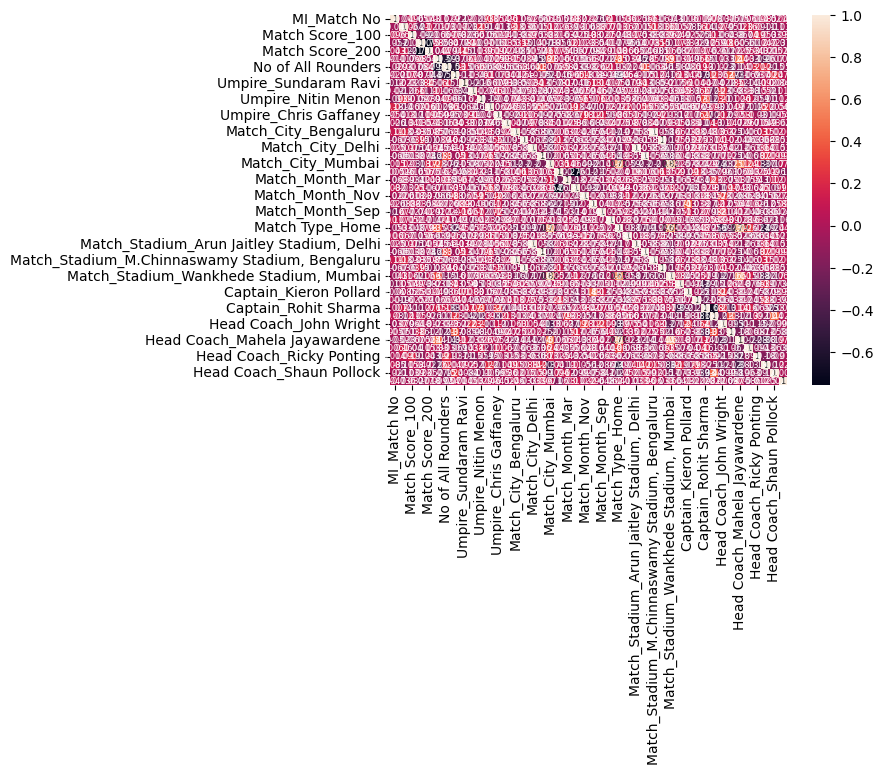

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize":6})

In [139]:
from sklearn.model_selection import train_test_split
X =Data.loc[:, Data.columns != 'Result_Win']
y = Data['Result_Win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(C=10,max_iter=500).fit(X_train, y_train)

In [141]:
m1.coef_

array([[-0.22910169, -0.59282991, -0.83732183, -0.79378528, -0.54923828,
        -0.73123167, -0.73011011,  1.61588387,  0.30283935,  0.45254675,
         0.30280075, -0.0469448 ,  0.97305369,  0.20444638,  1.00931913,
         0.45408396, -0.13452972,  0.66188259,  1.1226069 , -0.37788013,
        -0.18989699,  0.2680137 , -0.84016766,  1.30750307, -0.16148623,
        -0.13807989, -0.20241961, -0.29550478, -0.13452972,  0.66188259,
         1.00931913,  0.45408396,  0.43912103,  0.30686196, -1.01473682,
        -0.64304231, -0.30157553,  0.4190142 ,  0.58599704, -1.10735683,
         0.16203805, -0.81975363,  0.3681325 ,  0.24352012,  0.5735085 ]])

In [142]:
m1.intercept_

array([0.91605401])

In [143]:
pred = m1.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1])

In [144]:
X_test.head()

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Captain_Ricky Ponting,Captain_Rohit Sharma,Captain_Sachin Tendulkar,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock
67,0.500000,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
245,0.722222,1.0,0.0,1.0,0.0,0.6,0.000000,0.8,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
208,0.333333,0.0,0.0,1.0,0.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
222,0.222222,0.0,0.0,0.0,1.0,0.6,0.166667,0.6,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90,0.111111,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [145]:
X_test['Result'] = y_test
X_test.head()

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Captain_Rohit Sharma,Captain_Sachin Tendulkar,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock,Result
67,0.500000,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
245,0.722222,1.0,0.0,1.0,0.0,0.6,0.000000,0.8,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
208,0.333333,0.0,0.0,1.0,0.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
222,0.222222,0.0,0.0,0.0,1.0,0.6,0.166667,0.6,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
90,0.111111,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [146]:
X_test['Prediction'] = pred
X_test.head()

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Captain_Sachin Tendulkar,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock,Result,Prediction
67,0.500000,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
245,0.722222,1.0,0.0,1.0,0.0,0.6,0.000000,0.8,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
208,0.333333,0.0,0.0,1.0,0.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
222,0.222222,0.0,0.0,0.0,1.0,0.6,0.166667,0.6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
90,0.111111,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1


In [148]:
X_test['Correct'] = 1 - ((X_test['Result'] - X_test['Prediction']).abs())
X_test.head()

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock,Result,Prediction,Correct
67,0.500000,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1
245,0.722222,1.0,0.0,1.0,0.0,0.6,0.000000,0.8,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1
208,0.333333,0.0,0.0,1.0,0.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1
222,0.222222,0.0,0.0,0.0,1.0,0.6,0.166667,0.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0
90,0.111111,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1


In [149]:
X_test['Correct'].mean()

0.5405405405405406

In [150]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cm = confusion_matrix(y_test, pred, labels=labels)
#cm

pd.DataFrame(cm, index=labels, columns=labels)

,0,1
0,11,28
1,6,29


In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.28      0.39        39
           1       0.51      0.83      0.63        35

    accuracy                           0.54        74
   macro avg       0.58      0.56      0.51        74
weighted avg       0.58      0.54      0.51        74



In [152]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, pred)
Precision = metrics.precision_score(y_test, pred)
Recall = metrics.recall_score(y_test, pred)
print("Accuracy :",accuracy)
print("Precision:",Precision)
print("Recall   :",Recall)

Accuracy : 0.5405405405405406
Precision: 0.5087719298245614
Recall   : 0.8285714285714286


In [153]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': m1.coef_[0]})

In [154]:
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
7,No of Batsman,1.615884
23,Match_Month_Oct,1.307503
18,Match_City_Mumbai,1.122607
30,"Match_Stadium_M.Chinnaswamy Stadium, Bengaluru",1.009319
14,Match_City_Bengaluru,1.009319
12,Umpire_Chris Gaffaney,0.973054
29,"Match_Stadium_Eden Gardens, Kolkata",0.661883
17,Match_City_Kolkata,0.661883
38,Head Coach_John Wright,0.585997
44,Head Coach_Shaun Pollock,0.573509


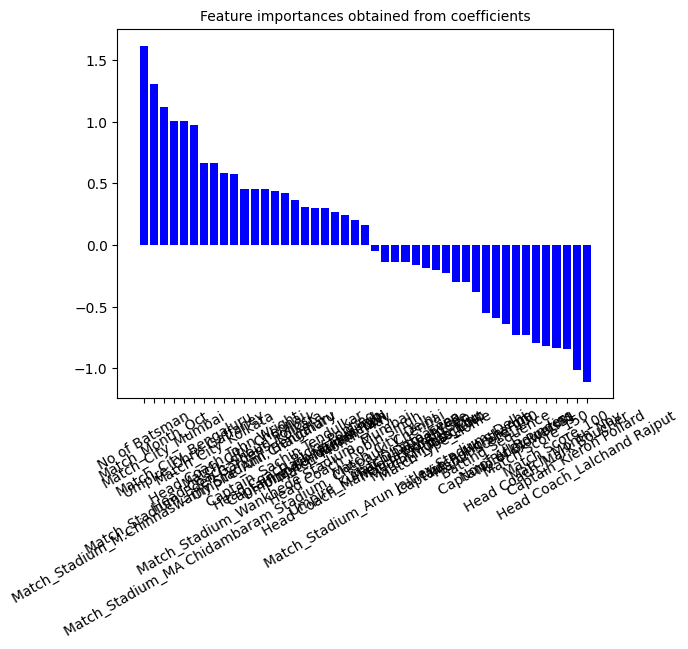

In [155]:
import matplotlib.pyplot as plt
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='Blue')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation=30)
plt.show()